# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [12]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

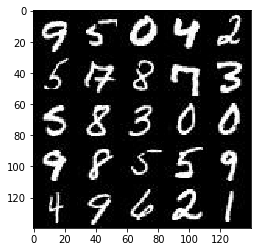

In [13]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

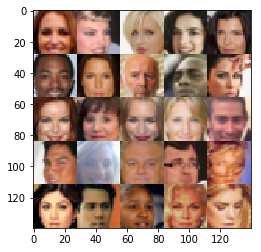

In [14]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [15]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [16]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real')
    z_data = tf.placeholder(tf.float32, (None, z_dim), name='z_data')
    learn_rate = tf.placeholder(tf.float32, shape=(), name='learn_rate')

    return real_input, z_data, learn_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [17]:
# I have made changes compared to the DCGAN architecture in the lesson.
# I have added additional kernel size 3 convolutions at each layer, and changed the final resize to a convolution
# and flattening.

# Hopefully this will work as well or better than the DCGAN architecture in the lesson.

def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):

#
#         # input image will be 28x28x3
#         layer1 = tf.layers.conv2d(images, 64, 3, padding='same', activation=None)
#         layer1 = tf.layers.batch_normalization(layer1, training=True)
#         layer1 = tf.maximum(0.2 * layer1, layer1)
#         layer1 = tf.layers.conv2d(layer1, 64, 3, padding='same', activation=None)
# #         layer1 = tf.layers.conv2d(layer1, 64, 5, strides=2, padding='same', activation=None)
#         layer1 = tf.layers.batch_normalization(layer1, training=True)   # Check whether to use this BN 
#         layer1 = tf.maximum(0.2 * layer1, layer1)
#         layer1 = tf.layers.average_pooling2d(layer1, 2, 2, padding='same')
        
#         # image is now 14x14x64
#         layer2 = tf.layers.conv2d(layer1, 128, 3, padding='same', activation=None)
#         layer2 = tf.maximum(0.2 * layer2, layer2)
# #         layer2 = tf.layers.conv2d(layer2, 128, 5, strides=2, padding='same', activation=None)
#         layer2 = tf.layers.batch_normalization(layer2, training=True)
#         layer2 = tf.layers.conv2d(layer1, 128, 3, padding='same', activation=None)
#         layer2 = tf.maximum(0.2 * layer2, layer2)
#         layer2 = tf.layers.batch_normalization(layer2, training=True)
#         layer2 = tf.layers.average_pooling2d(layer2, 2, 2, padding='same')
        
#         # image is now 7x7x128
#         layer3 = tf.layers.conv2d(layer2, 256, 3, padding='same', activation=None)
#         layer3 = tf.maximum(0.2 * layer3, layer3)
# #         layer3 = tf.layers.conv2d(layer3, 256, 5, strides=2, padding='same', activation=None)
#         layer3 = tf.layers.batch_normalization(layer3, training=True)
#         layer3 = tf.layers.conv2d(layer2, 256, 3, padding='same', activation=None)
#         layer3 = tf.maximum(0.2 * layer3, layer3)
#         layer3 = tf.layers.batch_normalization(layer3, training=True)
#         layer3 = tf.layers.average_pooling2d(layer3, 2, 2, padding='same')
        
#         # image is now 4x4x256
#         # no global average pooling in tf, so use 4x4 convolution, then flatten
#         flat = tf.layers.conv2d(layer3, 512, 4, 1, padding='valid', activation=None)
#         flat = tf.maximum(0.2 * flat, flat)
#         flat = tf.contrib.layers.flatten(flat)
        
#         # image is now flat batchx512
#         # run through a dense layer to get the logit for real or fake
#         logits = tf.layers.dense(flat, 1, activation=None)
        
#         # put the logit through a sigmoid activation to give a probability of real or fake
#         output = tf.nn.sigmoid(logits)
        
        ## Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(0.2 * x1, x1)
        ## 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(0.2 * bn2, bn2)
        ## 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(0.2 * bn3, bn3)
        ## 4x4x256
        #print(relu3.shape)

        ## Flatten it
        #flat = tf.reshape(relu2, (-1, 4*4*256))
        flat = tf.contrib.layers.flatten(relu3)
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)

    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [18]:
# Although DCGAN in the training courses uses transpose convolutions to resize the images in the earlier encoder/decoder
# lesson we used resize instead, so I have decided to use that.

# I was also inspired by the architecture of the NVIDIA paper:
# PROGRESSIVE GROWING OF GANS FOR IMPROVED QUALITY, STABILITY, AND VARIATION
# http://research.nvidia.com/sites/default/files/pubs/2017-10_Progressive-Growing-of/karras2018iclr-paper.pdf

# So I have used resize_nearest_neighbour for resizing, and have used regular convolutions with kernel sizes of 3
# Hopefully this will work as well or better than the DCGAN architecture

def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse= not is_train):
        # starting with a batch times z_dim vector, change to a 1024x4x4
        layer1 = tf.layers.dense(z, 4*4*512)
        layer1 = tf.reshape(layer1, (-1, 4, 4, 512))
        layer1 = tf.layers.conv2d(layer1, 512, 3, padding='same')
        layer1 = tf.layers.batch_normalization(layer1, training=is_train)
        layer1 = tf.maximum(0.2 * layer1, layer1)
        layer1 = tf.image.resize_nearest_neighbor(layer1, (7, 7))
        
        # image is now 7x7x512
        layer2 = tf.layers.conv2d(layer1, 512, 3, padding='same', activation=None)
        layer2 = tf.layers.batch_normalization(layer2, training=is_train)
        layer2 = tf.maximum(0.2 * layer2, layer2)
        layer2 = tf.layers.conv2d(layer2, 512, 3, padding='same', activation=None)
        layer2 = tf.layers.batch_normalization(layer2, training=is_train)
        layer2 = tf.maximum(0.2 * layer2, layer2)
        layer2 = tf.image.resize_nearest_neighbor(layer2, (14, 14))
        
        # image is now 14x14x512
        layer3 = tf.layers.conv2d(layer2, 256, 3, padding='same', activation=None)
        layer3 = tf.layers.batch_normalization(layer3, training=is_train)
        layer3 = tf.maximum(0.2 * layer3, layer3)
        layer3 = tf.layers.conv2d(layer3, 256, 3, padding='same', activation=None)
        layer3 = tf.layers.batch_normalization(layer3, training=is_train)
        layer3 = tf.maximum(0.2 * layer3, layer3)
        layer3 = tf.image.resize_nearest_neighbor(layer3, (28, 28))
        
        # final layer to output image image is now 28x28x256
        layer4 = tf.layers.conv2d(layer3, 128, 3, padding='same', activation=None)
        layer4 = tf.layers.batch_normalization(layer4, training=is_train)
        layer4 = tf.maximum(0.2 * layer4, layer4)
        layer4 = tf.layers.conv2d(layer4, 128, 3, padding='same', activation=None)
        layer4 = tf.layers.batch_normalization(layer4, training=is_train)
        layer4 = tf.maximum(0.2 * layer4, layer4)
        
        # image is now 28x28x128 run a 1x1 convolution with 3 filters to get 28x28x3
        output = tf.layers.conv2d(layer4, out_channel_dim, 3, padding='same', activation=tf.nn.tanh)
        
#         # First fully connected layer
#         x1 = tf.layers.dense(z, 4*4*512)
#         # Reshape it to start the convolutional stack
#         x1 = tf.reshape(x1, (-1, 4, 4, 512))
#         x1 = tf.layers.batch_normalization(x1, training=is_train)
#         x1 = tf.maximum(0.2 * x1, x1)
#         # 4x4x512 now
        
#         x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
#         x2 = tf.layers.batch_normalization(x2, training=is_train)
#         x2 = tf.maximum(0.2 * x2, x2)
#         # 8x8x256 now
        
#         x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
#         x3 = tf.layers.batch_normalization(x3, training=is_train)
#         x3 = tf.maximum(0.2 * x3, x3)
#         # 16x16x128 now
        
#         # Output layer
#         logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
#         # 32x32x3 now
#         logits = logits[:, 2:30, 2:30, :]
#         # 28x28x3 now
        
#         output = tf.tanh(logits)
        
        
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [19]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    # Create the discriminator network and get output
    g_model = generator(input_z, out_channel_dim)
    
    # Create a discriminator and get output from real input (should output 1)
    d_model_real, d_logits_real = discriminator(input_real)
    # Create discriminator with fake image data, reuse the weights from other discriminator (should output 0)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse = True)
    
    # Now calculate the loss for the discriminator network
    d_loss_real = tf.reduce_mean(
                    tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
                    tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(
                    tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [20]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    with tf.control_dependencies(update_ops):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [21]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [22]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    image_channels = data_shape[-1]
    
    image_width = data_shape[-2]
    
    image_height = data_shape[-3]
    
    input_real, input_z, learn_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    losses = []
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps +=1
                
                batch_images=batch_images*2
                
                # Sample random noise for the input vector for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                
                
                if steps % 10 == 0:
                    train_loss_d = d_loss.eval(feed_dict={input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval(feed_dict={input_z: batch_z})
                    
                    print('Epoch = ', epoch_i + 1)
                    print('Train_loss_d = ', train_loss_d)
                    print('Train_loss_g = ', train_loss_g)
                    
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % 50 == 0:
                    n_images = 25
                    # Try using a decreasing learning rate with each50 batches
                    learning_rate = learning_rate*0.95
                    print('Learning rate = ', learning_rate)
                    show_generator_output(sess, n_images, input_z, image_channels, data_image_mode)
    
        # At the end of training print out one last set of images
        n_images = 25
        show_generator_output(sess, n_images, input_z, image_channels, data_image_mode)
    return losses
        
                    

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch =  1
Train_loss_d =  0.09200449
Train_loss_g =  6.3910313
Epoch =  1
Train_loss_d =  1.6287585
Train_loss_g =  3.8165488
Epoch =  1
Train_loss_d =  1.5419585
Train_loss_g =  3.5362773
Epoch =  1
Train_loss_d =  1.0881032
Train_loss_g =  2.5944452
Epoch =  1
Train_loss_d =  0.9413936
Train_loss_g =  2.2343743


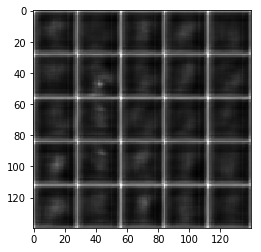

Epoch =  1
Train_loss_d =  0.91671526
Train_loss_g =  1.3063745
Epoch =  1
Train_loss_d =  0.94296753
Train_loss_g =  2.2772367
Epoch =  1
Train_loss_d =  1.0349264
Train_loss_g =  1.6721
Epoch =  1
Train_loss_d =  0.99827147
Train_loss_g =  1.6942129
Epoch =  1
Train_loss_d =  0.9988508
Train_loss_g =  1.4900838


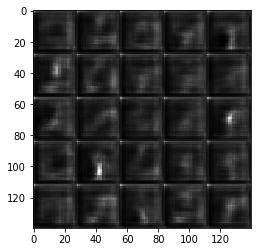

Epoch =  1
Train_loss_d =  1.1490444
Train_loss_g =  0.98883283
Epoch =  1
Train_loss_d =  1.2855177
Train_loss_g =  0.89220136
Epoch =  1
Train_loss_d =  0.9959895
Train_loss_g =  1.2796364
Epoch =  1
Train_loss_d =  1.1197088
Train_loss_g =  1.1878612
Epoch =  1
Train_loss_d =  0.914824
Train_loss_g =  1.3810779


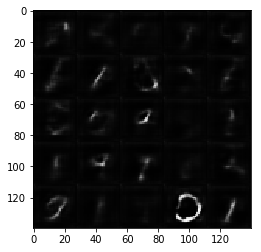

Epoch =  1
Train_loss_d =  1.0313305
Train_loss_g =  1.3317406
Epoch =  1
Train_loss_d =  1.1599758
Train_loss_g =  1.0103335
Epoch =  1
Train_loss_d =  1.1756818
Train_loss_g =  1.0260261
Epoch =  1
Train_loss_d =  1.1419152
Train_loss_g =  1.3125613
Epoch =  1
Train_loss_d =  1.1465203
Train_loss_g =  0.89867914


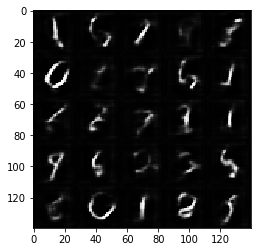

Epoch =  1
Train_loss_d =  1.1484709
Train_loss_g =  1.1844695
Epoch =  1
Train_loss_d =  1.1297491
Train_loss_g =  1.0030525
Epoch =  1
Train_loss_d =  1.1165826
Train_loss_g =  1.1650486
Epoch =  1
Train_loss_d =  1.1400306
Train_loss_g =  1.0986172
Epoch =  1
Train_loss_d =  1.232539
Train_loss_g =  1.1547748


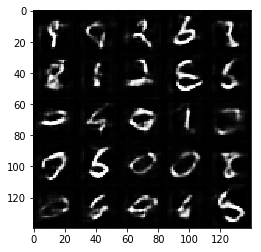

Epoch =  1
Train_loss_d =  1.2207319
Train_loss_g =  0.93313175
Epoch =  1
Train_loss_d =  1.1569508
Train_loss_g =  1.1119841
Epoch =  1
Train_loss_d =  1.2008474
Train_loss_g =  1.006827
Epoch =  1
Train_loss_d =  1.1725805
Train_loss_g =  0.8318238
Epoch =  1
Train_loss_d =  1.2927747
Train_loss_g =  0.712101


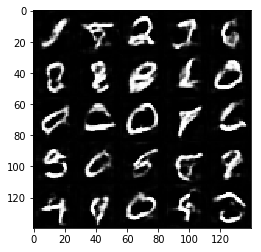

Epoch =  1
Train_loss_d =  1.2124788
Train_loss_g =  0.97776115
Epoch =  1
Train_loss_d =  1.2429893
Train_loss_g =  0.8930792
Epoch =  1
Train_loss_d =  1.2278634
Train_loss_g =  0.9132838
Epoch =  1
Train_loss_d =  1.2498956
Train_loss_g =  0.8807436
Epoch =  1
Train_loss_d =  1.1899824
Train_loss_g =  0.98990315


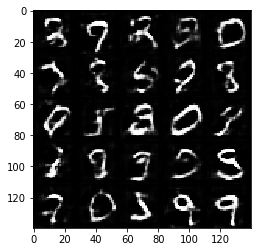

Epoch =  1
Train_loss_d =  1.2669497
Train_loss_g =  0.87447345
Epoch =  1
Train_loss_d =  1.265919
Train_loss_g =  1.0276375
Epoch =  1
Train_loss_d =  1.2127966
Train_loss_g =  0.9518715
Epoch =  1
Train_loss_d =  1.1866927
Train_loss_g =  0.91958785
Epoch =  1
Train_loss_d =  1.1667435
Train_loss_g =  0.9107436


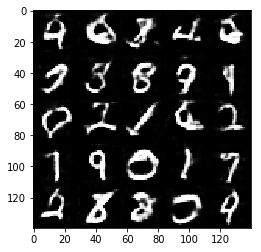

Epoch =  1
Train_loss_d =  1.1917626
Train_loss_g =  0.98471415
Epoch =  1
Train_loss_d =  1.2120576
Train_loss_g =  0.8411294
Epoch =  1
Train_loss_d =  1.2219713
Train_loss_g =  0.8939229
Epoch =  1
Train_loss_d =  1.2514207
Train_loss_g =  0.8253983
Epoch =  1
Train_loss_d =  1.2927698
Train_loss_g =  0.721635


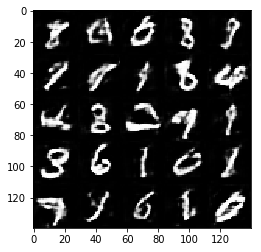

Epoch =  1
Train_loss_d =  1.3273335
Train_loss_g =  0.814831
Epoch =  2
Train_loss_d =  1.2376995
Train_loss_g =  0.8261864
Epoch =  2
Train_loss_d =  1.3384483
Train_loss_g =  0.79624665
Epoch =  2
Train_loss_d =  1.2562912
Train_loss_g =  0.7825506
Epoch =  2
Train_loss_d =  1.2932389
Train_loss_g =  0.81951916


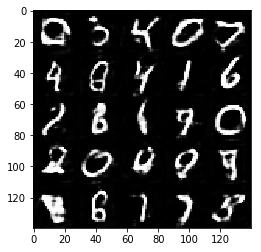

Epoch =  2
Train_loss_d =  1.3236792
Train_loss_g =  0.85371614
Epoch =  2
Train_loss_d =  1.3132602
Train_loss_g =  0.82356036
Epoch =  2
Train_loss_d =  1.2773454
Train_loss_g =  0.8598215
Epoch =  2
Train_loss_d =  1.2357984
Train_loss_g =  0.82022315
Epoch =  2
Train_loss_d =  1.2369933
Train_loss_g =  0.90645623


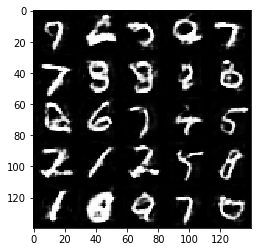

Epoch =  2
Train_loss_d =  1.255716
Train_loss_g =  0.8631145
Epoch =  2
Train_loss_d =  1.2781307
Train_loss_g =  0.76920265
Epoch =  2
Train_loss_d =  1.2229806
Train_loss_g =  0.9540136
Epoch =  2
Train_loss_d =  1.3069665
Train_loss_g =  0.85556483
Epoch =  2
Train_loss_d =  1.2854602
Train_loss_g =  0.7622752


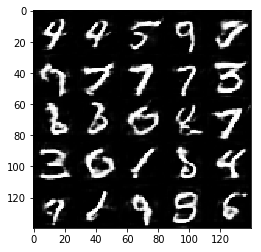

Epoch =  2
Train_loss_d =  1.2685189
Train_loss_g =  0.79937375
Epoch =  2
Train_loss_d =  1.2580758
Train_loss_g =  0.801607
Epoch =  2
Train_loss_d =  1.2922704
Train_loss_g =  0.789207
Epoch =  2
Train_loss_d =  1.3340763
Train_loss_g =  0.77125645
Epoch =  2
Train_loss_d =  1.3215959
Train_loss_g =  0.7464479


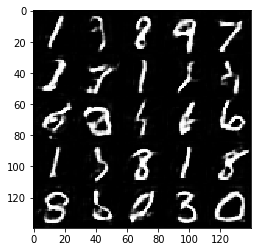

Epoch =  2
Train_loss_d =  1.3294308
Train_loss_g =  0.7936138
Epoch =  2
Train_loss_d =  1.3226432
Train_loss_g =  0.79114807
Epoch =  2
Train_loss_d =  1.2893994
Train_loss_g =  0.7766943
Epoch =  2
Train_loss_d =  1.2686981
Train_loss_g =  0.8063716
Epoch =  2
Train_loss_d =  1.2695314
Train_loss_g =  0.83825225


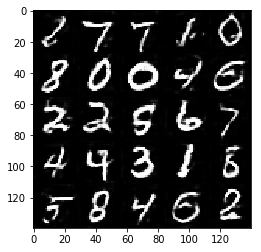

Epoch =  2
Train_loss_d =  1.2893388
Train_loss_g =  0.8074173
Epoch =  2
Train_loss_d =  1.3132977
Train_loss_g =  0.747353
Epoch =  2
Train_loss_d =  1.2775848
Train_loss_g =  0.8086498
Epoch =  2
Train_loss_d =  1.2611473
Train_loss_g =  0.83798456
Epoch =  2
Train_loss_d =  1.2888036
Train_loss_g =  0.7833295


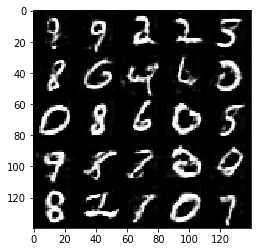

Epoch =  2
Train_loss_d =  1.2951105
Train_loss_g =  0.8018154
Epoch =  2
Train_loss_d =  1.2953957
Train_loss_g =  0.81182563
Epoch =  2
Train_loss_d =  1.2869138
Train_loss_g =  0.75776064
Epoch =  2
Train_loss_d =  1.3193812
Train_loss_g =  0.7753817
Epoch =  2
Train_loss_d =  1.3309329
Train_loss_g =  0.8151074


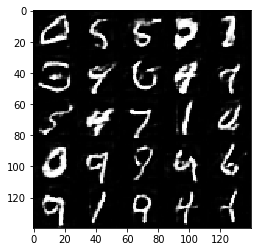

Epoch =  2
Train_loss_d =  1.3130014
Train_loss_g =  0.7369405
Epoch =  2
Train_loss_d =  1.2749823
Train_loss_g =  0.83095336
Epoch =  2
Train_loss_d =  1.325481
Train_loss_g =  0.7634983
Epoch =  2
Train_loss_d =  1.268824
Train_loss_g =  0.8171549
Epoch =  2
Train_loss_d =  1.3075807
Train_loss_g =  0.7483595


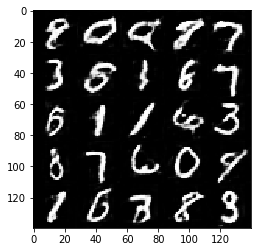

Epoch =  2
Train_loss_d =  1.2942091
Train_loss_g =  0.80779624
Epoch =  2
Train_loss_d =  1.3161572
Train_loss_g =  0.752266
Epoch =  2
Train_loss_d =  1.3512039
Train_loss_g =  0.745811
Epoch =  2
Train_loss_d =  1.3434486
Train_loss_g =  0.7585078
Epoch =  2
Train_loss_d =  1.3162088
Train_loss_g =  0.7411603


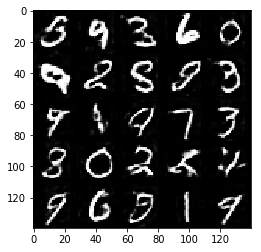

Epoch =  2
Train_loss_d =  1.3129776
Train_loss_g =  0.7915639
Epoch =  2
Train_loss_d =  1.3331544
Train_loss_g =  0.743038
Epoch =  2
Train_loss_d =  1.315732
Train_loss_g =  0.8070067


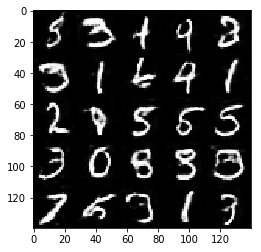

In [23]:
batch_size = 128
z_dim = 100
learning_rate = 0.00025
beta1 = 0.5

# Nvidia paper uses adam( lr = 0.001, beta1 = 0, beta2 = 0.99, epsilon = 10-8 )
# DCGAN uses adam ( lr = 0.0002, beta1 = 0.5, beta2 = 0.999, epsilon = 10-8 )
# My network is a bit of a mix between the two above, so I will have to experiment and review the results from mnist.

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    losses = train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

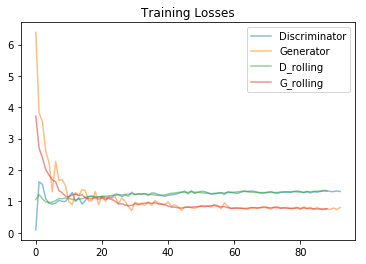

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.plot(np.convolve(losses.T[0], np.ones((5,))/5, mode='valid'), label='D_rolling', alpha=0.5)
plt.plot(np.convolve(losses.T[1], np.ones((5,))/5, mode='valid'), label='G_rolling', alpha=0.5)
plt.title("Training Losses")
plt.legend()

### Summary thoughts

Pitting the Nvidia inspired generator vs the DCGAN discriminator seemed to give the generator a consistent edge

Using a diminishing learning rate also seemed to keep the network losses more consistent near the end of training.

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch =  1
Train_loss_d =  0.38267317
Train_loss_g =  6.5283065
Epoch =  1
Train_loss_d =  1.1302196
Train_loss_g =  5.835556
Epoch =  1
Train_loss_d =  0.9843445
Train_loss_g =  4.847751
Epoch =  1
Train_loss_d =  1.0582764
Train_loss_g =  3.6587193
Epoch =  1
Train_loss_d =  1.0530899
Train_loss_g =  2.6547246


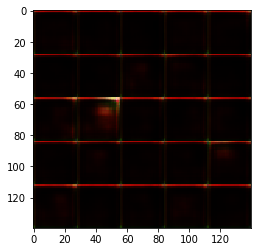

Epoch =  1
Train_loss_d =  1.1484294
Train_loss_g =  2.6822867
Epoch =  1
Train_loss_d =  0.9817417
Train_loss_g =  1.705483
Epoch =  1
Train_loss_d =  0.9416344
Train_loss_g =  1.4526074
Epoch =  1
Train_loss_d =  0.86921597
Train_loss_g =  1.3126171
Epoch =  1
Train_loss_d =  1.1580352
Train_loss_g =  2.1114888


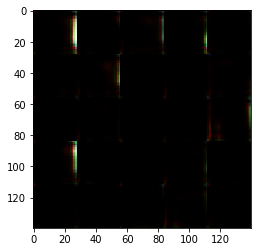

Epoch =  1
Train_loss_d =  1.1819017
Train_loss_g =  1.74119
Epoch =  1
Train_loss_d =  1.0011553
Train_loss_g =  1.544989
Epoch =  1
Train_loss_d =  1.0484941
Train_loss_g =  1.6246779
Epoch =  1
Train_loss_d =  1.408963
Train_loss_g =  1.4398665
Epoch =  1
Train_loss_d =  1.1083615
Train_loss_g =  1.1043981


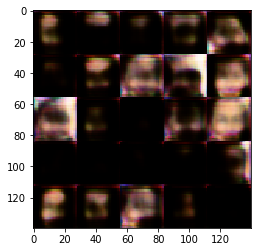

Epoch =  1
Train_loss_d =  1.0615225
Train_loss_g =  1.3802733
Epoch =  1
Train_loss_d =  0.9618027
Train_loss_g =  1.3974931
Epoch =  1
Train_loss_d =  1.2159839
Train_loss_g =  1.3392608
Epoch =  1
Train_loss_d =  1.1250496
Train_loss_g =  1.2711401
Epoch =  1
Train_loss_d =  1.159931
Train_loss_g =  1.1884694


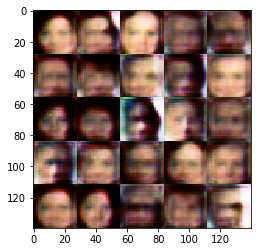

Epoch =  1
Train_loss_d =  0.92869914
Train_loss_g =  1.555873
Epoch =  1
Train_loss_d =  1.1704757
Train_loss_g =  1.2819585
Epoch =  1
Train_loss_d =  1.0683792
Train_loss_g =  1.3409697
Epoch =  1
Train_loss_d =  1.1313683
Train_loss_g =  1.0762603
Epoch =  1
Train_loss_d =  0.93086684
Train_loss_g =  1.4969153


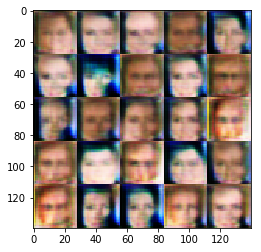

Epoch =  1
Train_loss_d =  1.1087723
Train_loss_g =  1.5612426
Epoch =  1
Train_loss_d =  1.136277
Train_loss_g =  1.418232
Epoch =  1
Train_loss_d =  1.1093593
Train_loss_g =  1.2994735
Epoch =  1
Train_loss_d =  0.9850493
Train_loss_g =  1.3341693
Epoch =  1
Train_loss_d =  0.89981043
Train_loss_g =  1.4187833


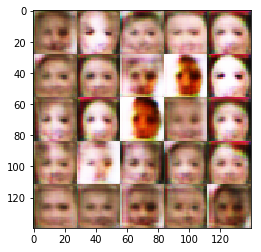

Epoch =  1
Train_loss_d =  1.0604262
Train_loss_g =  1.2940905
Epoch =  1
Train_loss_d =  1.0698708
Train_loss_g =  1.1261147
Epoch =  1
Train_loss_d =  1.02365
Train_loss_g =  1.1927078
Epoch =  1
Train_loss_d =  1.0259192
Train_loss_g =  1.3793818
Epoch =  1
Train_loss_d =  0.9340899
Train_loss_g =  1.4620993


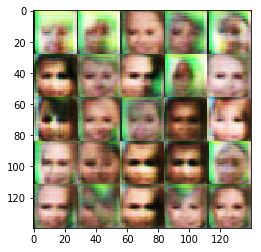

Epoch =  1
Train_loss_d =  0.978005
Train_loss_g =  1.4289522
Epoch =  1
Train_loss_d =  1.1386015
Train_loss_g =  1.3773719
Epoch =  1
Train_loss_d =  1.1988617
Train_loss_g =  1.2777194
Epoch =  1
Train_loss_d =  1.1372061
Train_loss_g =  1.3146908
Epoch =  1
Train_loss_d =  1.0967262
Train_loss_g =  1.0503578


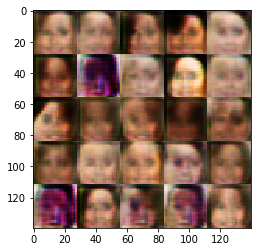

Epoch =  1
Train_loss_d =  1.21848
Train_loss_g =  1.2459834
Epoch =  1
Train_loss_d =  1.1198143
Train_loss_g =  1.1699687
Epoch =  1
Train_loss_d =  1.1903163
Train_loss_g =  1.0773225
Epoch =  1
Train_loss_d =  1.3200753
Train_loss_g =  0.9898759
Epoch =  1
Train_loss_d =  1.0764837
Train_loss_g =  1.2063012


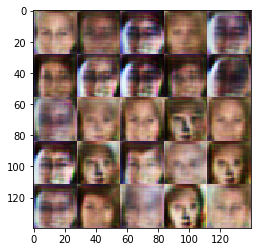

Epoch =  1
Train_loss_d =  1.3365645
Train_loss_g =  0.9999293
Epoch =  1
Train_loss_d =  1.195015
Train_loss_g =  1.0107698
Epoch =  1
Train_loss_d =  1.2158988
Train_loss_g =  1.0770271
Epoch =  1
Train_loss_d =  1.2289529
Train_loss_g =  1.0166816
Epoch =  1
Train_loss_d =  1.3480659
Train_loss_g =  0.90302145


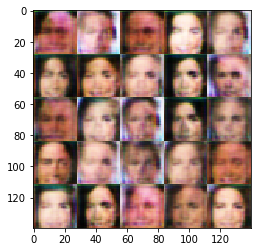

Epoch =  1
Train_loss_d =  1.2716887
Train_loss_g =  0.93720067
Epoch =  1
Train_loss_d =  1.124196
Train_loss_g =  1.0274403
Epoch =  1
Train_loss_d =  1.0796518
Train_loss_g =  1.0564381
Epoch =  1
Train_loss_d =  1.1763897
Train_loss_g =  1.016867
Epoch =  1
Train_loss_d =  1.2152126
Train_loss_g =  1.026534


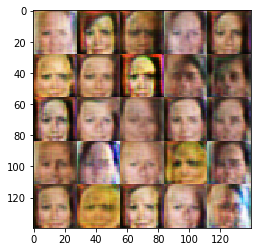

Epoch =  1
Train_loss_d =  1.2508378
Train_loss_g =  0.9755308
Epoch =  1
Train_loss_d =  1.3902745
Train_loss_g =  0.9587588
Epoch =  1
Train_loss_d =  1.2088943
Train_loss_g =  1.0580566
Epoch =  1
Train_loss_d =  1.3163247
Train_loss_g =  0.8937361
Epoch =  1
Train_loss_d =  1.2470737
Train_loss_g =  0.98928946


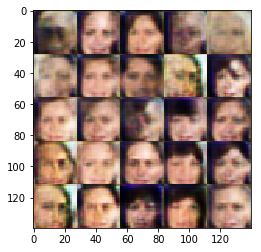

Epoch =  1
Train_loss_d =  1.3471894
Train_loss_g =  0.862395
Epoch =  1
Train_loss_d =  1.2227769
Train_loss_g =  0.9239564
Epoch =  1
Train_loss_d =  1.3276223
Train_loss_g =  0.8330959
Epoch =  1
Train_loss_d =  1.2293317
Train_loss_g =  0.96779567
Epoch =  1
Train_loss_d =  1.2525148
Train_loss_g =  0.99359214


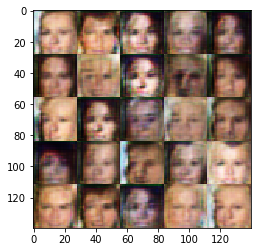

Epoch =  1
Train_loss_d =  1.3223693
Train_loss_g =  0.88509536
Epoch =  1
Train_loss_d =  1.2928238
Train_loss_g =  0.90592396
Epoch =  1
Train_loss_d =  1.3757656
Train_loss_g =  0.84712744
Epoch =  1
Train_loss_d =  1.2904642
Train_loss_g =  0.9079956
Epoch =  1
Train_loss_d =  1.3301004
Train_loss_g =  0.86381423


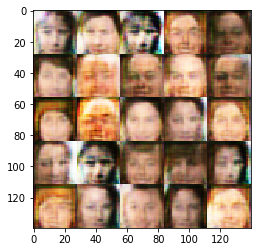

Epoch =  1
Train_loss_d =  1.4361087
Train_loss_g =  0.7796977
Epoch =  1
Train_loss_d =  1.4029429
Train_loss_g =  0.7918037
Epoch =  1
Train_loss_d =  1.3333044
Train_loss_g =  0.849971
Epoch =  1
Train_loss_d =  1.2564647
Train_loss_g =  0.8601605
Epoch =  1
Train_loss_d =  1.3468747
Train_loss_g =  0.79119307


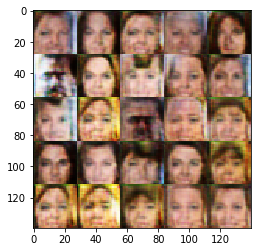

Epoch =  1
Train_loss_d =  1.3251157
Train_loss_g =  0.8108258
Epoch =  1
Train_loss_d =  1.350234
Train_loss_g =  0.76113856
Epoch =  1
Train_loss_d =  1.3211379
Train_loss_g =  0.801674
Epoch =  1
Train_loss_d =  1.3244547
Train_loss_g =  0.7884264
Epoch =  1
Train_loss_d =  1.1967858
Train_loss_g =  0.877975


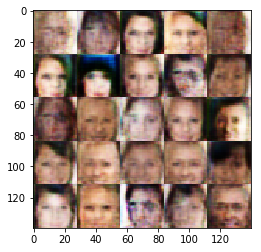

Epoch =  1
Train_loss_d =  1.3774049
Train_loss_g =  0.7505434
Epoch =  1
Train_loss_d =  1.3127171
Train_loss_g =  0.7762488
Epoch =  1
Train_loss_d =  1.4254674
Train_loss_g =  0.76226866
Epoch =  1
Train_loss_d =  1.4057579
Train_loss_g =  0.80455816
Epoch =  1
Train_loss_d =  1.3560772
Train_loss_g =  0.80167127


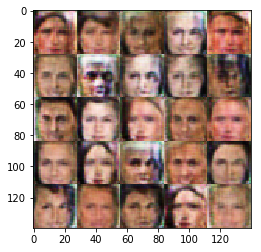

Epoch =  1
Train_loss_d =  1.3199204
Train_loss_g =  0.8262898
Epoch =  1
Train_loss_d =  1.3438897
Train_loss_g =  0.7786927
Epoch =  1
Train_loss_d =  1.386682
Train_loss_g =  0.8042362
Epoch =  1
Train_loss_d =  1.2890757
Train_loss_g =  0.80887717
Epoch =  1
Train_loss_d =  1.3494731
Train_loss_g =  0.7631272


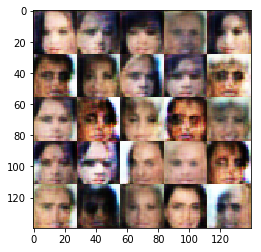

Epoch =  1
Train_loss_d =  1.3448584
Train_loss_g =  0.7697135
Epoch =  1
Train_loss_d =  1.2957762
Train_loss_g =  0.81346506
Epoch =  1
Train_loss_d =  1.3121567
Train_loss_g =  0.78910893
Epoch =  1
Train_loss_d =  1.328227
Train_loss_g =  0.79254484
Epoch =  1
Train_loss_d =  1.3933482
Train_loss_g =  0.75018215


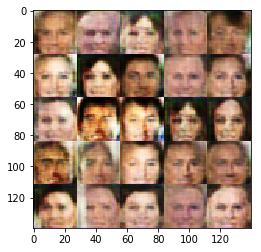

Epoch =  1
Train_loss_d =  1.32022
Train_loss_g =  0.80095977
Epoch =  1
Train_loss_d =  1.2693617
Train_loss_g =  0.8290527
Epoch =  1
Train_loss_d =  1.2619908
Train_loss_g =  0.83518153
Epoch =  1
Train_loss_d =  1.341201
Train_loss_g =  0.7795621
Epoch =  1
Train_loss_d =  1.3668752
Train_loss_g =  0.7757282


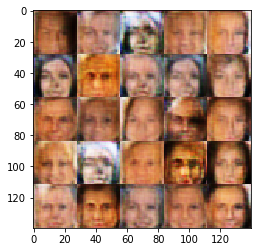

Epoch =  1
Train_loss_d =  1.3388317
Train_loss_g =  0.7926508
Epoch =  1
Train_loss_d =  1.3317893
Train_loss_g =  0.7587135
Epoch =  1
Train_loss_d =  1.3669467
Train_loss_g =  0.75666773
Epoch =  1
Train_loss_d =  1.2465324
Train_loss_g =  0.8183568
Epoch =  1
Train_loss_d =  1.3495672
Train_loss_g =  0.7801343


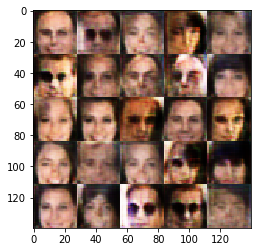

Epoch =  1
Train_loss_d =  1.3345815
Train_loss_g =  0.7682317
Epoch =  1
Train_loss_d =  1.3703566
Train_loss_g =  0.7789968
Epoch =  1
Train_loss_d =  1.2898943
Train_loss_g =  0.7734353
Epoch =  1
Train_loss_d =  1.3925356
Train_loss_g =  0.7228331
Epoch =  1
Train_loss_d =  1.3782396
Train_loss_g =  0.7230355


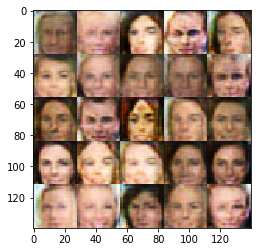

Epoch =  1
Train_loss_d =  1.366896
Train_loss_g =  0.76888406
Epoch =  1
Train_loss_d =  1.3860517
Train_loss_g =  0.70986587
Epoch =  1
Train_loss_d =  1.3565719
Train_loss_g =  0.73379564
Epoch =  1
Train_loss_d =  1.3291137
Train_loss_g =  0.77061915
Epoch =  1
Train_loss_d =  1.3447783
Train_loss_g =  0.78825426


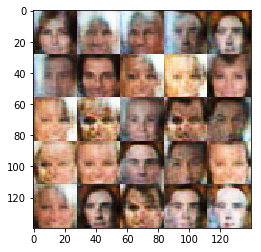

Epoch =  1
Train_loss_d =  1.3412685
Train_loss_g =  0.7673776
Epoch =  1
Train_loss_d =  1.3373237
Train_loss_g =  0.7686404
Epoch =  1
Train_loss_d =  1.3206658
Train_loss_g =  0.7754532
Epoch =  1
Train_loss_d =  1.410779
Train_loss_g =  0.7244227
Epoch =  1
Train_loss_d =  1.3569837
Train_loss_g =  0.7607813


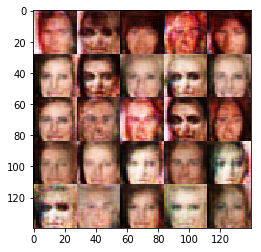

Epoch =  1
Train_loss_d =  1.3133428
Train_loss_g =  0.77407694
Epoch =  1
Train_loss_d =  1.383043
Train_loss_g =  0.74083567
Epoch =  1
Train_loss_d =  1.345126
Train_loss_g =  0.76355636
Epoch =  1
Train_loss_d =  1.3521609
Train_loss_g =  0.7401978
Epoch =  1
Train_loss_d =  1.3488948
Train_loss_g =  0.7772806


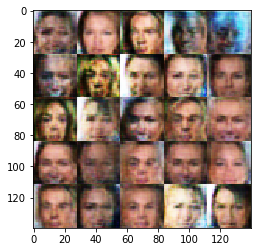

Epoch =  1
Train_loss_d =  1.3935351
Train_loss_g =  0.74422103
Epoch =  1
Train_loss_d =  1.3602096
Train_loss_g =  0.74483806
Epoch =  1
Train_loss_d =  1.3571216
Train_loss_g =  0.74207723
Epoch =  1
Train_loss_d =  1.4011656
Train_loss_g =  0.7151811
Epoch =  1
Train_loss_d =  1.3442423
Train_loss_g =  0.7501285


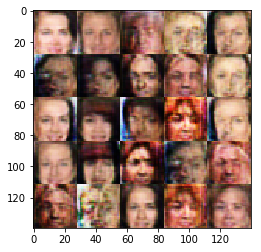

Epoch =  1
Train_loss_d =  1.3877363
Train_loss_g =  0.7218322
Epoch =  1
Train_loss_d =  1.3750262
Train_loss_g =  0.7347193
Epoch =  1
Train_loss_d =  1.3915541
Train_loss_g =  0.71984696
Epoch =  1
Train_loss_d =  1.3917978
Train_loss_g =  0.70211613
Epoch =  1
Train_loss_d =  1.4528413
Train_loss_g =  0.71737444


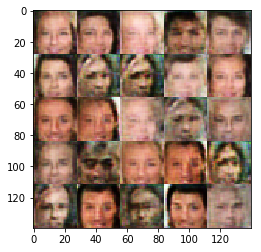

Epoch =  1
Train_loss_d =  1.3947132
Train_loss_g =  0.7162993
Epoch =  1
Train_loss_d =  1.3741218
Train_loss_g =  0.7158429
Epoch =  1
Train_loss_d =  1.4001338
Train_loss_g =  0.690948
Epoch =  1
Train_loss_d =  1.3830596
Train_loss_g =  0.7211959
Epoch =  1
Train_loss_d =  1.3903008
Train_loss_g =  0.7171171


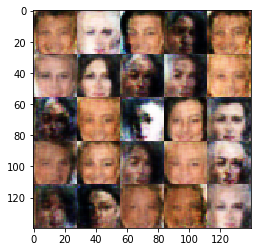

Epoch =  1
Train_loss_d =  1.3859165
Train_loss_g =  0.7215186
Epoch =  1
Train_loss_d =  1.3765845
Train_loss_g =  0.72036844
Epoch =  1
Train_loss_d =  1.3569093
Train_loss_g =  0.7297636
Epoch =  1
Train_loss_d =  1.3799227
Train_loss_g =  0.7308337
Epoch =  1
Train_loss_d =  1.3767359
Train_loss_g =  0.7220465


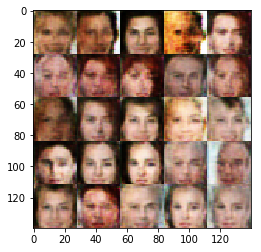

Epoch =  1
Train_loss_d =  1.3475698
Train_loss_g =  0.7232027
Epoch =  1
Train_loss_d =  1.3662379
Train_loss_g =  0.72409374
Epoch =  1
Train_loss_d =  1.4203479
Train_loss_g =  0.69711804
Epoch =  1
Train_loss_d =  1.4048631
Train_loss_g =  0.6925559
Epoch =  1
Train_loss_d =  1.3729126
Train_loss_g =  0.7170479


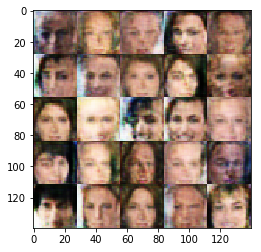

Epoch =  1
Train_loss_d =  1.3663797
Train_loss_g =  0.7276258
Epoch =  1
Train_loss_d =  1.3276813
Train_loss_g =  0.7480678
Epoch =  1
Train_loss_d =  1.3888937
Train_loss_g =  0.70882106
Epoch =  1
Train_loss_d =  1.3950133
Train_loss_g =  0.7126614
Epoch =  1
Train_loss_d =  1.3365171
Train_loss_g =  0.7348602


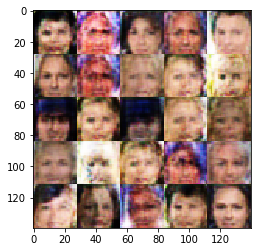

Epoch =  1
Train_loss_d =  1.3641894
Train_loss_g =  0.7366039
Epoch =  1
Train_loss_d =  1.4093611
Train_loss_g =  0.71449757
Epoch =  1
Train_loss_d =  1.3908627
Train_loss_g =  0.73158276


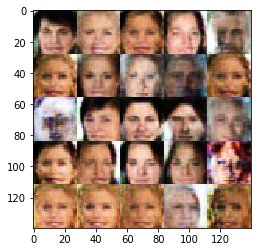

In [25]:
batch_size = 128
z_dim = 100
learning_rate = 0.00025
beta1 = 0.5

# With diminishing leaning rate the learning rate should be 1/5th the starting rate by the end of training.

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    losses = train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

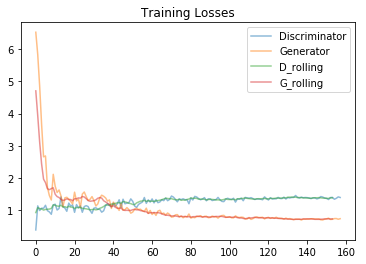

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.plot(np.convolve(losses.T[0], np.ones((5,))/5, mode='valid'), label='D_rolling', alpha=0.5)
plt.plot(np.convolve(losses.T[1], np.ones((5,))/5, mode='valid'), label='G_rolling', alpha=0.5)
plt.title("Training Losses")
plt.legend()

## Summary and thoughts

I am pleased with the results of the project with the images lookings pretty realistic (although there is definitely the odd fightening looking image).

Using these nets (Nvidia inspired generator, and DCGAN discriminator), and hyperparameters the nets trained pretty well with the generated images having enough variety through the training. The generator loss made it below the discriminator loss after about 40 (400) steps and was consistently below the discriminator from then on.

## Additional notes on net architectures

I first tried the straight DCGAN architecture from the classes which worked, but was more checkerboard like that the resize method of generating images. I also tried the full Nvidia inspired architecture which gave smoother (less checkerboard) results, but looked a bit more ghostly looking. I am happy with the combination of the two (the smooth generated images from Nvidia, and DCGAN discriminator).

I have kept the coding for the other architectures I used in the notebook, but have commented them out so it is easy to eexperiment and swap between, and also for review.

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.